In [7]:
import numpy as np
from PIL import Image
import struct
import matplotlib.pyplot as plt
import math

In [19]:
def read_images():
    images = []
    image = None    
    with open("train-images-idx3-ubyte", "rb") as f:
        # Endianness dependency
        magic_number = int(struct.unpack('i', f.read(4)[::-1])[0])
        number_items = int(struct.unpack('i', f.read(4)[::-1])[0])
        rows = int(struct.unpack('i', f.read(4)[::-1])[0])
        cols = int(struct.unpack('i', f.read(4)[::-1])[0])

        for k in range(0, number_items):
            image = np.zeros([rows, cols])
            for i in range(0, cols):
                for j in range(0, rows):
                    byte = f.read(1)
                    pixel = int(struct.unpack('B', byte)[0])
                    image[i][j] = pixel
    
            images.append(image)
        
    return images

In [20]:
def read_labels():
    
    with open("train-labels-idx1-ubyte", "rb") as f:
        # Endianness dependency
        magic_number = struct.unpack('i', f.read(4)[::-1])
        number_items = int(struct.unpack('i', f.read(4)[::-1])[0])
         
        labels = []

        for i in range(0, number_items):
            label = np.zeros(10)
            byte = f.read(1)
            label_val = int(struct.unpack('b', byte)[0])
            for i in range(0, 10):
                label[i] = int(i == label_val)

            labels.append(label)
        

    return labels

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


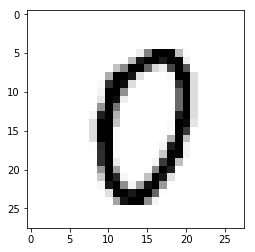

In [22]:
images = read_images()
labels = read_labels()
image = images[1000]
plt.imshow(image, cmap="Greys")
print(labels[1000])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
784


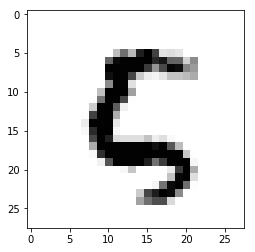

In [30]:
image_e = images[2000]
plt.imshow(image_e, cmap="Greys")
print(labels[2000])
print(image_e.size)

In [26]:
def activation(x):
    math.sigmoid( x )

In [36]:
def derivative_activation(x):
    return ( activation(x) * (1 - activation(x)) )

In [29]:
def norm_pixel(pixel):
    return ( (pixel - 127) / 255 )

In [ ]:
input_weights = ( np.random.rand( (image_e.size, image_e.size) ) - 0.5 ) * 2
hidden_weights = ( np.random.rand( (397, image_e.size) ) - 0.5 ) * 2
output_weights = ( np.random.rand( (10, 397) ) - 0.5 ) * 2

input_sums = np.zeros( (image_e.size, 1) )
hidden_sums = np.zeros( (397, 1) )
output_sums = np.zeros( (10, 1) )

activations_input = np.zeros( (image_e.size, 1) )
activations_hidden = np.zeros( (397, 1) )
activations_output = np.zeros( (10, 1) )

derivs_input = np.zeross( (image_e.size, image_e.size) )
derivs_hidden = np.zeros( (397, image_e.size) )
derivs_output = np.zeros( (10, 397) )

iterations = 1
learning_rate = 0.1

############################### TRAINING ###########################
for l in range(0, len(images) ):
    ################## FORWARD PASS ##################
    ### input layer ###
    for i in range(0, image_e.size):
        for j in range(0, image_e.size):
            input_sums[i] += norm_pixel( images[l].flatten()[j]) * input_weights[i][j]
        activations_input[i] = activation( input_sums[i] )
    #####################
    
    ### hidden layer ###
    for i in range(0, 397):
        for j in range(0, image_e.size):
            hidden_sums[i] =  activations_input[j] * hidden_weights[i][j]
        activations_hidden[i] = activation( hidden_sums[i] )
    #####################
    
    ### output layer ###
    for i in range(0, 10):
        for j in range(0, 397):
            output_sums[i] = activations_hidden[j] * output_weights[i][j]
        activations_output[i] = activation( output_sums[i] )
    ####################
    #################################################
    
    ################# BACK PROPAGATION ###############
    ### output layer ###
    #derivative 
    # dC/dz = d - z -- d is actual output
    # dz/dP = sigmoid(P) * (1 - sigmoid(P))
    # dP/dw_i = a[i]
    for i in range(0, 10):
        for j in range(0, 397):
            deriv = (labels[l][i] - activation_output[i]) * derivative_activation(output_sums[i]) * activations_hidden[j]
            derivs_output[i][j] += learning_rate * deriv
    #####################
    
    ### hidden layer ###
    #derivative 
    # dC/dz = d - z -- d is actual output
    # dz/dP = sigmoid(P) * (1 - sigmoid(P))
    # dP/dw_i = a[i]
    for i in range(0, 397):
        for j in range(0, image_e.size):
            deriv = derivative_activation(hidden_sums[i]) * activations_input[j]
            derivs_hidden[j][i] += learning_rate * deriv
    #####################
    
    ### input layer ###
    #derivative 
    # dC/dz = d - z -- d is actual output
    # dz/dP = sigmoid(P) * (1 - sigmoid(P))
    # dP/dw_i = a[i]
    for i in range(0, image_e.size):
        for j in range(0, image_e.size):
            deriv = derivative_activation(input_sums[i]) * images[l].flatten()[j] 
            derivs_input[j][i] += learning_rate * deriv
    #####################
    
    ##################################################

In [38]:
a = np.arange(6).reshape(2,3)
print(np.sum(a[0]))

for i in range(0,7):
    print(a.flatten()[i])

3
0
1
2
3
4
5


IndexError: index 6 is out of bounds for axis 0 with size 6